In [1]:
import pandas as pd
import xarray as xr

In [2]:
SIM_ID_DIMENSION = "site"
SITE_ID_VAR = "site_id"
LAT_VAR = "lat"
LON_VAR = "lon"
WEIGHT_VAR = "weight"
CAPACITY_FACTOR_VAR = "electricity"
WEIGHTED_CAPACITY_FACTOR_VAR = "weighted_electricity"
ORIENTATION_VAR = "_orientation"
FLAT_SURFACE = "flat"
FILE_SUFFIX = "nc"

In [3]:
data_dir = "../land-eligibility/data/capacityfactors/rooftop-pv.nc"

In [4]:
ds = xr.open_dataset(data_dir)
ds

<xarray.Dataset>
Dimensions:       (site: 46767, time: 166560)
Coordinates:
  * time          (time) datetime64[ns] 2000-01-01 ... 2018-12-31T23:00:00
  * site          (site) object '20_E_18' '20_E_26' ... '1782_W_32' '1782_W_44'
Data variables:
    electricity   (site, time) float64 ...
    weight        (site) float64 ...
    site_id       (site) float64 ...
    lat           (site) float64 ...
    lon           (site) float64 ...
    tilt          (site) float64 ...
    _orientation  (site) object ...
    azim          (site) float64 ...
    _pr           (site) float64 ...
    dataset       (site) object ...
    interpolate   (site) bool ...
    tracking      (site) int64 ...
    date_from     (site) object ...
    date_to       (site) object ...
    capacity      (site) int64 ...
    raw           (site) bool ...
    system_loss   (site) float64 ...

In [5]:
ds[WEIGHTED_CAPACITY_FACTOR_VAR] = ds[CAPACITY_FACTOR_VAR] * ds[WEIGHT_VAR]

## North-facing rooftop PV

In [6]:
mask = ds._orientation == "N"

In [7]:
sum_weights = ds[[WEIGHT_VAR, SITE_ID_VAR]].where(mask).groupby(SITE_ID_VAR).sum(dim=SIM_ID_DIMENSION).weight[0].item()
sum_weights

0.214062160346338

In [8]:
N = (
    ds[[WEIGHTED_CAPACITY_FACTOR_VAR, SITE_ID_VAR]]
    .where(mask)
    .groupby(SITE_ID_VAR)
    .sum(dim=SIM_ID_DIMENSION)
    [WEIGHTED_CAPACITY_FACTOR_VAR]
) / sum_weights

In [9]:
N.mean().item()

0.07879390886197887

In [10]:
xr.Dataset({"electricity": N}).to_netcdf("../euro-calliope/data/capacityfactors/rooftop-pv-n-timeseries.nc")

## East and West-facing

In [11]:
mask = (ds._orientation == "E") | (ds._orientation == "W")

In [12]:
sum_weights = ds[[WEIGHT_VAR, SITE_ID_VAR]].where(mask).groupby(SITE_ID_VAR).sum(dim=SIM_ID_DIMENSION).weight[0].item()
sum_weights

0.3935887816987714

In [13]:
EW = (
    ds[[WEIGHTED_CAPACITY_FACTOR_VAR, SITE_ID_VAR]]
    .where(mask)
    .groupby(SITE_ID_VAR)
    .sum(dim=SIM_ID_DIMENSION)
    [WEIGHTED_CAPACITY_FACTOR_VAR]
) / sum_weights
EW

<xarray.DataArray 'weighted_electricity' (site_id: 2751, time: 166560)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2018-12-31T23:00:00
  * site_id  (site_id) float64 20.0 21.0 22.0 ... 2.768e+03 2.769e+03 2.77e+03

In [14]:
EW.mean().item()

0.10381799331305346

In [15]:
xr.Dataset({"electricity": EW}).to_netcdf("../euro-calliope/data/capacityfactors/rooftop-pv-e-w-timeseries.nc")

## South-facing and flat

In [16]:
mask = (ds._orientation == "S") | (ds._orientation == "flat")

In [17]:
sum_weights = ds[[WEIGHT_VAR, SITE_ID_VAR]].where(mask).groupby(SITE_ID_VAR).sum(dim=SIM_ID_DIMENSION).weight[0].item()
sum_weights

0.3923490579548907

In [18]:
Sflat = (
    ds[[WEIGHTED_CAPACITY_FACTOR_VAR, SITE_ID_VAR]]
    .where(mask)
    .groupby(SITE_ID_VAR)
    .sum(dim=SIM_ID_DIMENSION)
    [WEIGHTED_CAPACITY_FACTOR_VAR]
) / sum_weights
Sflat

<xarray.DataArray 'weighted_electricity' (site_id: 2751, time: 166560)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2018-12-31T23:00:00
  * site_id  (site_id) float64 20.0 21.0 22.0 ... 2.768e+03 2.769e+03 2.77e+03

In [19]:
Sflat.mean().item()

0.12506110494113634

In [20]:
xr.Dataset({"electricity": Sflat}).to_netcdf("../euro-calliope/data/capacityfactors/rooftop-pv-s-flat-timeseries.nc")

## Test

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
sflat = (
    pd
    .read_csv("../build/model/continental/capacityfactors-rooftop-pv-s-flat.csv", index_col=0, parse_dates=True)
    .loc["2016"]
)
ew = (
    pd
    .read_csv("../build/model/continental/capacityfactors-rooftop-pv-e-w.csv", index_col=0, parse_dates=True)
    .loc["2016"]
)
n = (
    pd
    .read_csv("../build/model/continental/capacityfactors-rooftop-pv-n.csv", index_col=0, parse_dates=True)
    .loc["2016"]
)
util = (
    pd
    .read_csv("../build/model/continental/capacityfactors-open-field-pv.csv", index_col=0, parse_dates=True)
    .loc["2016"]
)

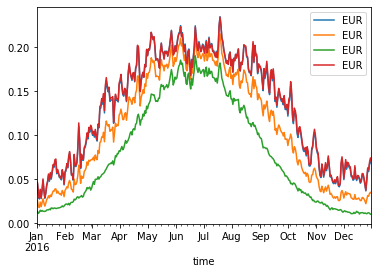

In [39]:
fig = plt.figure()
ax = fig.subplots(1)

sflat.resample("D").mean().plot(ax=ax)
ew.resample("D").mean().plot(ax=ax)
n.resample("D").mean().plot(ax=ax)
util.resample("D").mean().plot(ax=ax)

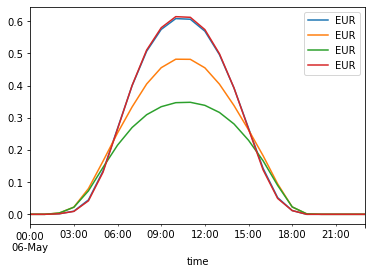

In [40]:
fig = plt.figure()
ax = fig.subplots(1)

sflat["2016-5-6"].plot(ax=ax)
ew["2016-5-6"].plot(ax=ax)
n["2016-5-6"].plot(ax=ax)
util["2016-5-6"].plot(ax=ax)